## 1. Import Necessary libraries

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## 2. Import Dataset

In [3]:
cars_data = pd.read_csv(filepath_or_buffer = "Cars.csv")
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

### 3.1 perform Initial Investigation on the data

In [4]:
cars_data.shape

(81, 5)

In [5]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [7]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## Now, let's check for the Assumptions

## Test 1: Linearity Test

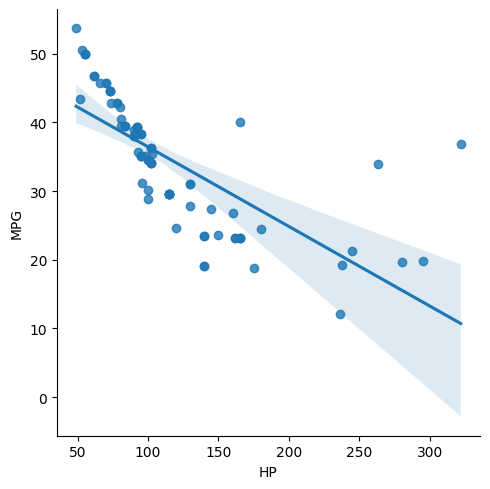

In [10]:
sns.lmplot(data = cars_data, x="HP", y="MPG",)

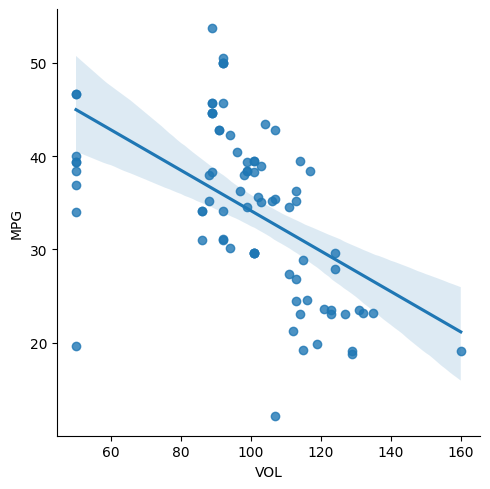

In [11]:
sns.lmplot(data = cars_data, x="VOL", y="MPG",)

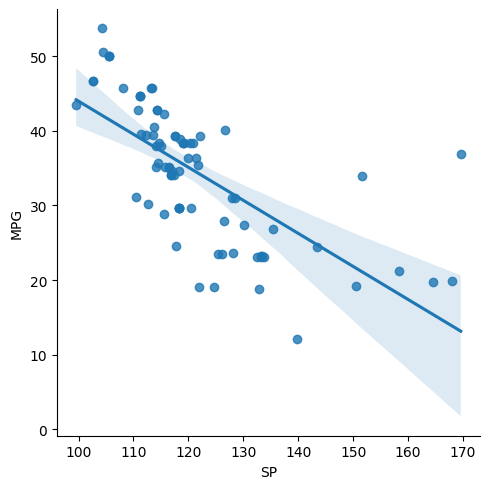

In [12]:
sns.lmplot(data = cars_data, x="SP", y="MPG",)

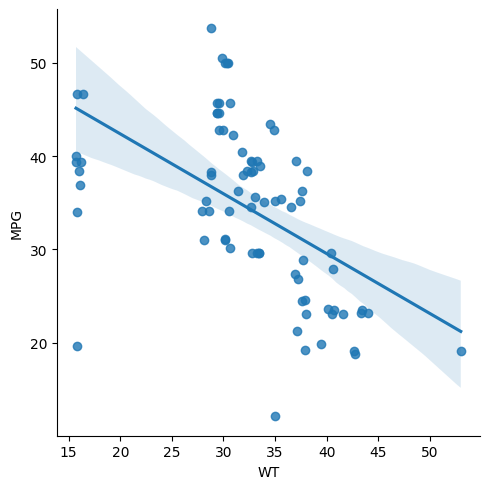

In [13]:
sns.lmplot(data = cars_data, x="WT", y="MPG",)

#### Test 1 Linearity Failed.

## Test 2: Normality Test

(array([15., 35.,  9.,  6.,  9.,  0.,  2.,  2.,  1.,  2.]),
 array([ 49. ,  76.3, 103.6, 130.9, 158.2, 185.5, 212.8, 240.1, 267.4,
        294.7, 322. ]),
 <BarContainer object of 10 artists>)

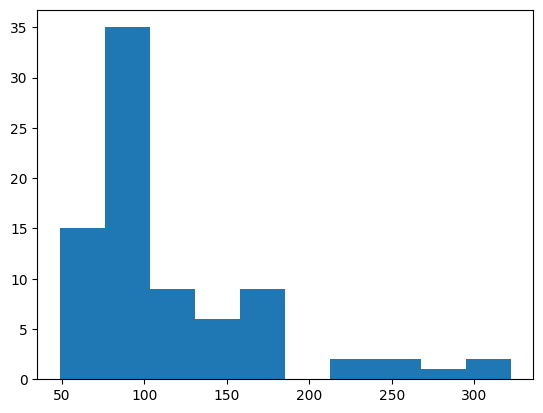

In [14]:
plt.hist(cars_data["HP"])

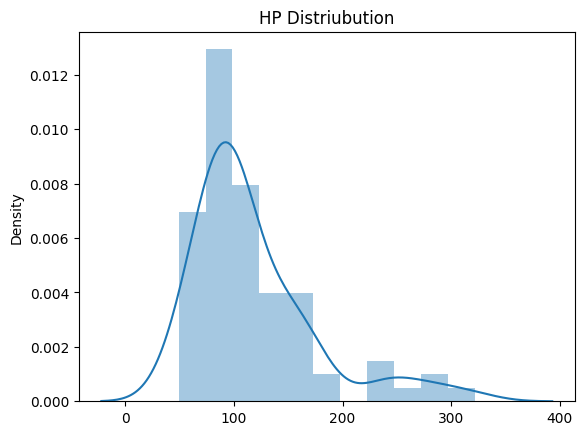

In [21]:
sns.distplot(x=cars_data["HP"])
plt.title("HP Distriubution")
plt.show()

(array([ 8., 12., 32., 10., 10.,  2.,  1.,  2.,  1.,  3.]),
 array([ 99.56490661, 106.56826723, 113.57162785, 120.57498847,
        127.57834909, 134.58170971, 141.58507032, 148.58843094,
        155.59179156, 162.59515218, 169.5985128 ]),
 <BarContainer object of 10 artists>)

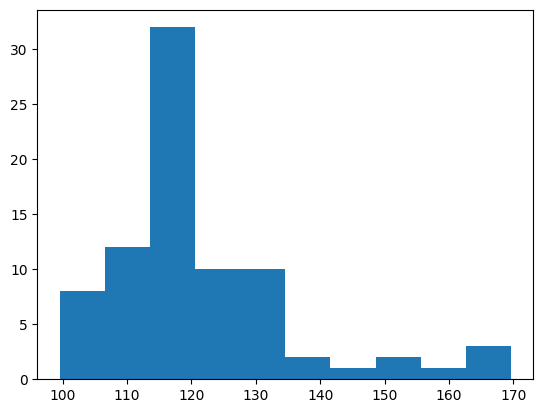

In [22]:
plt.hist(cars_data["SP"])

(array([ 9.,  0.,  0., 22., 20., 15.,  8.,  6.,  0.,  1.]),
 array([ 50.,  61.,  72.,  83.,  94., 105., 116., 127., 138., 149., 160.]),
 <BarContainer object of 10 artists>)

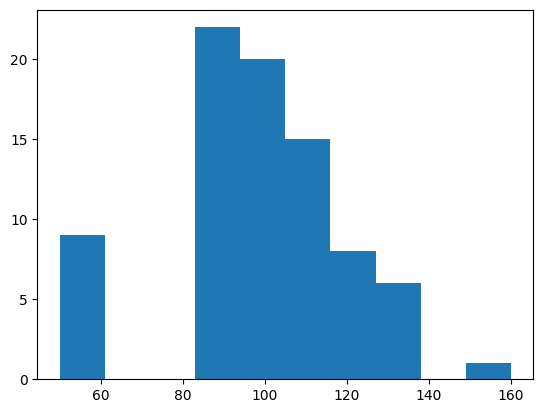

In [23]:
plt.hist(cars_data["VOL"])

(array([ 9.,  0.,  0., 22., 19., 18.,  7.,  5.,  0.,  1.]),
 array([15.71285853, 19.44134791, 23.1698373 , 26.89832668, 30.62681606,
        34.35530544, 38.08379483, 41.81228421, 45.54077359, 49.26926298,
        52.99775236]),
 <BarContainer object of 10 artists>)

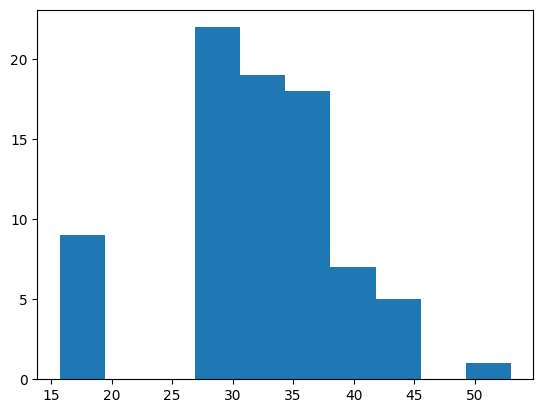

In [24]:
plt.hist(cars_data["WT"])

### Test 2 Normality also Failed

### Test 3 - Multicollinearity Test

In [26]:
corr_matrix = cars_data.corr()
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


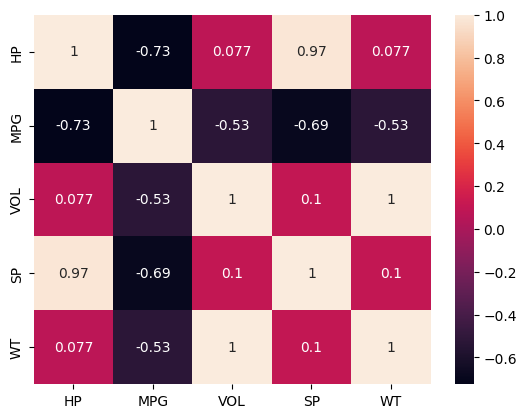

In [29]:
sns.heatmap(data = corr_matrix,annot=True)
plt.show()

### Test 3 - There is Multicollinearity in the Data

### Test 4 - AutoRegression Passed

## 4. Data Preparation

In [30]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [35]:
X = cars_data[["HP","VOL","SP","WT"]]
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [36]:
y = cars_data["MPG"]
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

### There is nothing to prepare because all features are numeric.

## 5. Model Building

In [32]:
linear_model  = LinearRegression()

## 6. Model Training

In [37]:
linear_model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
linear_model.intercept_

np.float64(30.67733585215165)

In [42]:
linear_model.coef_

array([-0.20544372, -0.33605084,  0.39562692,  0.40057409])

## 7.Model Testing

In [44]:
y_pred = linear_model.predict(X)
y_pred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

## 8. Model Evaluation

In [46]:
error = y - y_pred
error

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

In [48]:
cars_data["error"] = error
cars_data

,HP,MPG,VOL,SP,WT,error
0,49,53.700681,89,104.185353,28.762059,10.258747
1,55,50.013401,92,105.461264,30.466833,7.624608
2,55,50.013401,92,105.461264,30.193597,7.734060
3,70,45.696322,92,113.461264,30.632114,3.157963
4,53,50.504232,92,104.461264,29.889149,8.331584
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,15.617904
77,238,19.197888,115,150.576579,37.923113,1.298838
78,263,34.000000,50,151.598513,15.769625,7.863547
79,295,19.833733,119,167.944460,39.423099,7.517122


In [50]:
del cars_data["error"]

In [51]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Let's now perform Test 5: Homoscedasticity Test

ValueError: x and y must be the same size

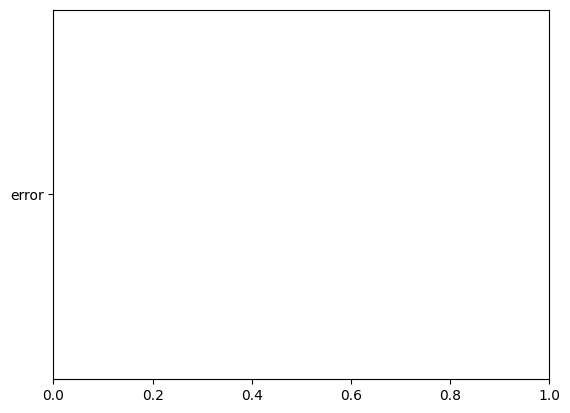

In [52]:
plt.scatter(data=cars_data, x = "HP", y = "error")

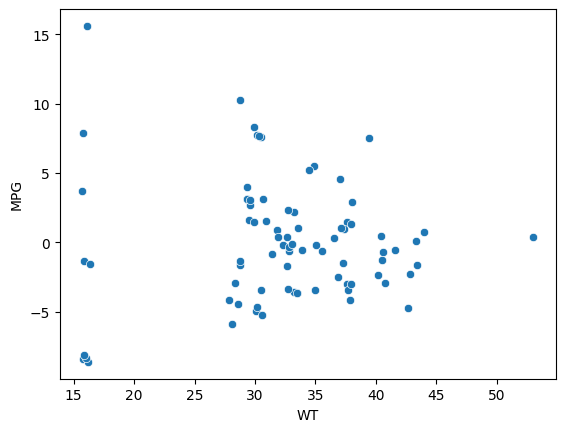

In [57]:
sns.scatterplot( data=cars_data,x = "WT", y = error)
plt.show()

### Test 5 Homoscedasticity Test also Failed

## Test 6: Zero Residual Mean Test

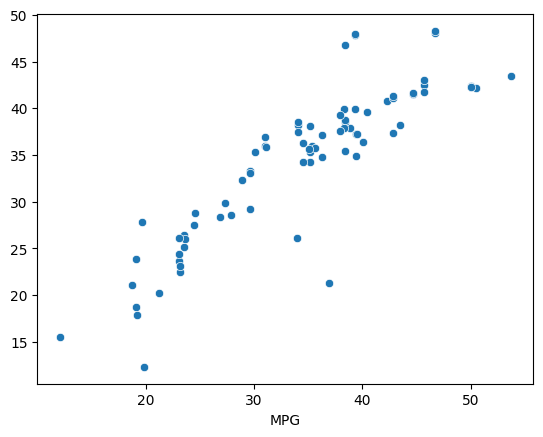

In [58]:
sns.scatterplot(x = cars_data["MPG"], y = y_pred)
plt.show()

### Test 6: Zero Residual Mean Test is also Failed

## 9. Model Deployment

In [59]:
from pickle import dump

In [61]:
dump(obj = linear_model,file = open(file = "linear_intelligence_file.pkl", mode='wb'))

In [62]:
from pickle import load

In [64]:
linear_intel_pkl = load(file = open(file = "linear_intelligence_file.pkl", mode='rb'))
linear_intel_pkl

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
linear_intel_pkl.predict(X)

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

## THE END!!